In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./DATA/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [5]:
df.columns = ['Signal', 'Density']

In [6]:
df.head()

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


<Axes: xlabel='Signal', ylabel='Density'>

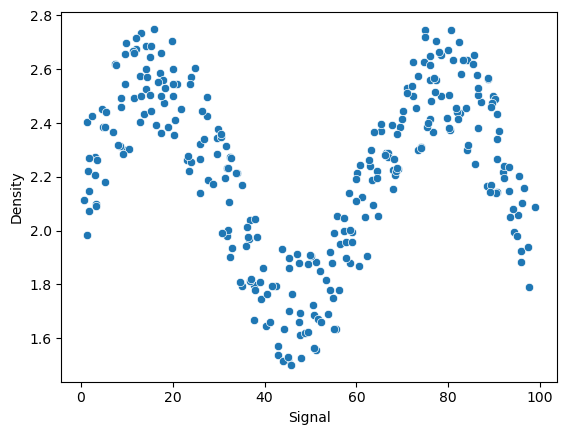

In [9]:
sns.scatterplot(data=df, x='Signal', y='Density')

In [24]:
from sklearn.model_selection import train_test_split
X=df['Signal'].values.reshape(-1,1)
y=df['Density']

In [26]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr_model= LinearRegression()

In [29]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [30]:
lr_preds=lr_model.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [32]:
lr_mae=mean_absolute_error(y_test,lr_preds)

In [33]:
lr_mae

0.211198973318633

In [35]:
lr_srmsq=np.sqrt(mean_squared_error(y_test,lr_preds))

In [36]:
lr_srmsq

0.2570051996584629

In [42]:
signal_rang=np.arange(0,100)
lr_sample_preds=lr_model.predict(signal_rang.reshape(-1,1))

<Axes: xlabel='Signal', ylabel='Density'>

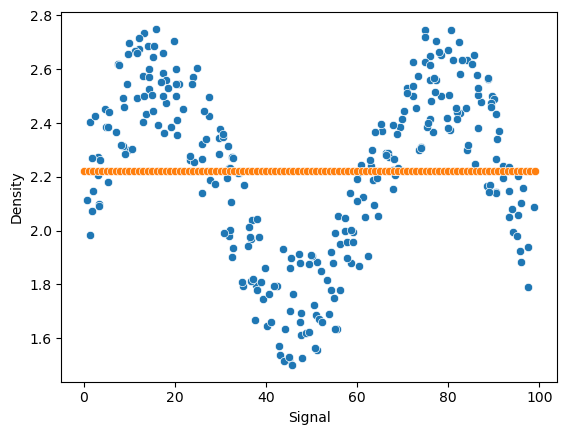

In [43]:
sns.scatterplot(data=df, x='Signal', y='Density')
sns.scatterplot(x=signal_rang, y=lr_sample_preds)

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [55]:
def run_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    preds=model.predict(X_test)
    rmse= np.sqrt(mean_squared_error(y_test,preds))
    mae= mean_absolute_error(y_test,preds)
    print(f'RMSE:{rmse}')
    print(f'MAE:{mae}')
    signal_range=np.arange(0,100)
    output=model.predict(signal_range.reshape(-1,1))
    sns.scatterplot(data=df, x='Signal', y='Density', color='black')
    plt.plot(signal_range,output)

In [58]:
pipe =make_pipeline(PolynomialFeatures(degree=10),LinearRegression())

RMSE:0.14011815618437704
MAE:0.12448948257771185


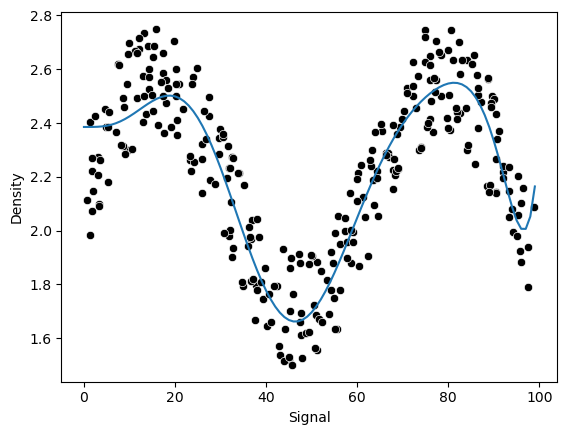

In [59]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [60]:
from sklearn.neighbors import KNeighborsRegressor

In [61]:
k_values=[1,5,10]


RMSE:0.1523487028635337
MAE:0.11877297474442378
RMSE:0.13730685016923647
MAE:0.12198383614100558
RMSE:0.13277855732740926
MAE:0.11635971693292672


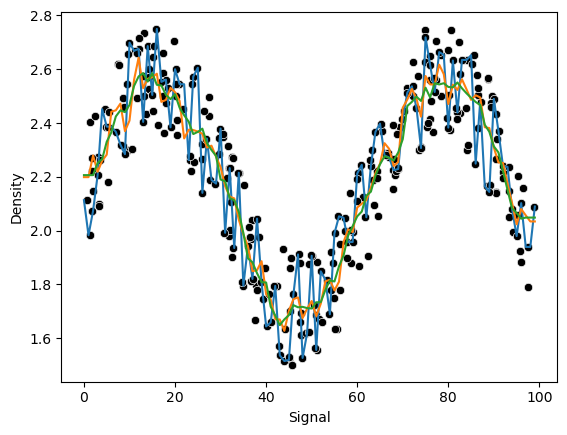

In [62]:
for i in k_values:
    model=KNeighborsRegressor(n_neighbors=i)
    run_model(model,X_train,y_train,X_test,y_test)

RMSE:0.1523487028635337
MAE:0.11877297474442378


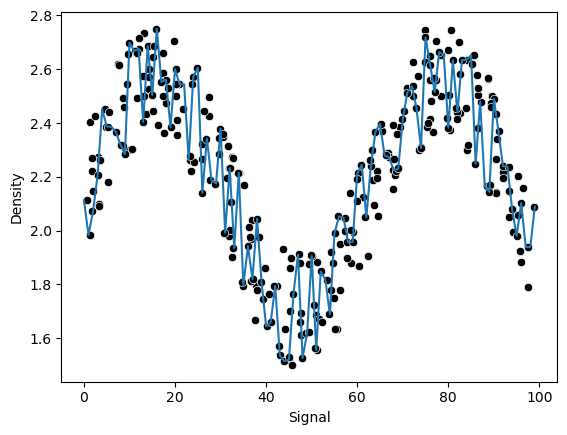

In [64]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

In [65]:
from sklearn.svm import SVR

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
model = SVR()

RMSE:0.12646999302046696
MAE:0.10854210121348368


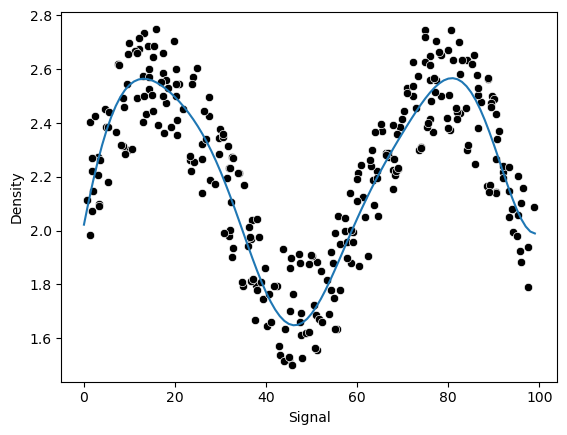

In [70]:
C=[0.01,0.1,1,5,10,100,1000]
param_grid={  'gamma':['auto','scale'],'C':C}
grid_model=GridSearchCV(estimator=model, param_grid=param_grid)
run_model(grid_model,X_train,y_train,X_test,y_test)

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rfr = RandomForestRegressor(n_estimators=10)

RMSE:0.11839075140211115
MAE:0.10042778297098773


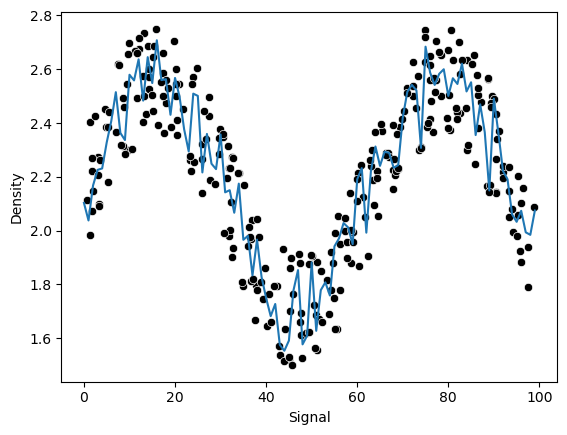

In [74]:
run_model(rfr,X_train,y_train,X_test,y_test)

In [75]:
from sklearn.ensemble import GradientBoostingRegressor,  AdaBoostRegressor

RMSE:0.13294148649584667
MAE:0.11318284854800689


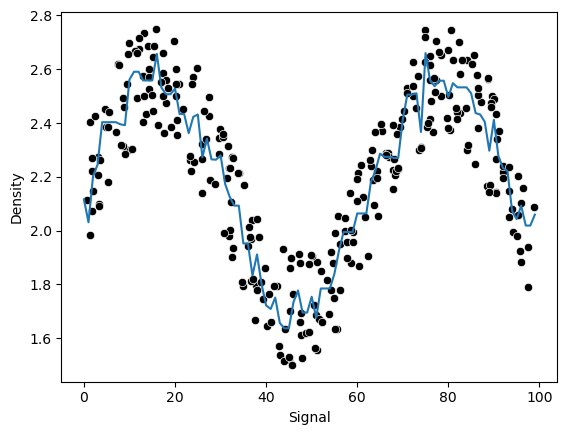

In [76]:
model= GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

RMSE:0.13376334255134942
MAE:0.11562723947243356


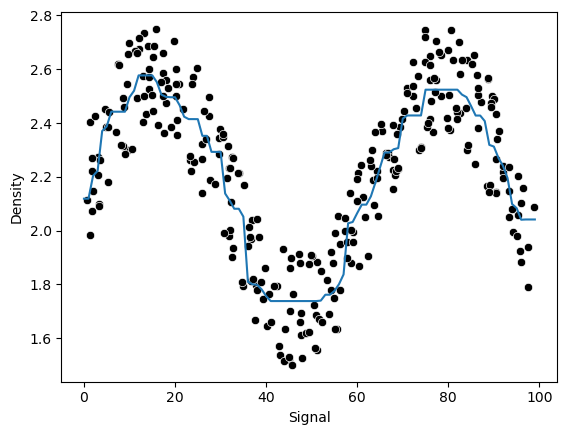

In [78]:
model= AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)